In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x,y = mnist['data'],mnist['target']

In [4]:
x = np.array(x)
y = np.array(y)

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [6]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

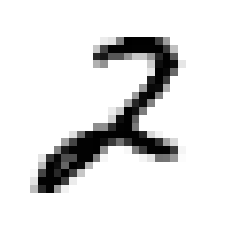

In [7]:
plt.imshow(some_digit_image, cmap= matplotlib.cm.binary , interpolation = 'nearest')
plt.axis("off")

In [8]:
x_train , x_test = x[:8000] , x[8000:10000]
y_train ,y_test = y[:8000] , y[8000:10000]

In [9]:
shuffle = np.random.permutation(8000)
x_train , y_train = x_train[shuffle], y_train[shuffle]

## creatiang a 2 detector

In [10]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
ytrain_2 = (y_train == 2)
ytest_2 = (y_test == 2)

In [11]:
y_train

array([3, 8, 6, ..., 9, 0, 9], dtype=int8)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf = DecisionTreeClassifier()

In [14]:
clf.fit(x_train,ytrain_2)

DecisionTreeClassifier()

In [15]:
clf.predict([some_digit])

array([ True])

In [16]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf ,x_train , ytrain_2 , cv = 3 ,scoring='accuracy')

In [17]:
a.mean()

0.9510001703650509

In [18]:
#ytrain_not2 = (y_train != 2)
#ytestnot_2 = (y_test != 2)

In [19]:
#clf.fit(x_train,ytrain_not2)

In [20]:
#clf.predict([some_digit])

In [21]:
#b = cross_val_score(clf ,x_train , ytrain_not2 , cv = 3 ,scoring='accuracy')

In [22]:
#b.mean()

## testing the model

In [23]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

[9]


(-0.5, 27.5, 27.5, -0.5)

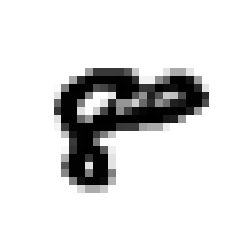

In [24]:
some_digit = x_test[47]
some_digit_image = some_digit.reshape(28,28)

z = clf.predict([some_digit])
print(z)

plt.imshow(some_digit_image, cmap= matplotlib.cm.binary , interpolation = 'nearest')
plt.axis("off")